## Exercise 4: Tensors and Tensor Factorization Techniques
This exercise is an introduction to latent representation and tensors. First we will understand latent representation using SVD. Later we will extend this idea to tensors. 


## Exercise-4.1-a
# Latent representation using SVD
Suppose we have to design a movie recommendation system. We are given some data of viewers and the movie they have seen in past. Now using this information we have to design a learning model which can recommend new movies depending on the pattern of data. 

Data is structured as a matrix where rows represent viewers and column represents movies. The entry is 1 if viewer has seen the movie. Missing values are what we want to predict.

In this part we will study following:

(a) SVD as a matrix factorization.

(b) Singular Vectors as a latent representation.

(c) Find latent representation cutoff using knee plot. 

(b) Predict Missing values and use it as a recommendation.

$$
Data = \left( \begin{array}{ccccccccccc}
                       & Movie-1 & Movie-2 & Movie-3 & Movie-4 & Movie-5 & Movie-6 & Movie-7 & Movie-8 & Movie-9 & Movie-10  \\ 
                Viewer-1 & \_  & \_ & 1 & 1 & 1 & \_ & \_ & \_ & \_ & \_\\
                Viewer-2 & 1  & \_ &  1 & 1 & \_ & 1 & \_ & \_ & 1 & \_\\  
                Viewer-3 & \_ &  \_ &  \_ & \_ & \_ & \_ & 1 & 1  & \_ & 1\\ 
                Viewer-4 & 1  & 1 & 1 & \_ & 1 & \_ & \_ & \_ & \_ & \_\\
                Viewer-5 & 1  & 1 & 1 & 1 & 1 & \_ & \_ & \_ & \_  & \_\\                
                Viewer-6 & \_ & \_ & 1 & 1 & 1 & \_ & \_ & \_ & 1 & \_ \\
                Viewer-7 & 1  & 1  & 1 & 1 & \_ & \_ & \_ & \_ & \_ & \_ \\
                Viewer-8 & \_  & \_ & \_ & 1 & \_ & 1 & \_ & 1 & 1 & 1\\  
                \end{array} 
\right)
$$


In [4]:
import numpy as np
from scipy.linalg import svd,diagsvd
import matplotlib.pyplot as plt
#generate the data 
X = np.array([[0,0,1,1,1,0,0,0,0,0],
             [1,0,1,1,0,1,0,0,1,0],
             [0,0,0,0,0,0,1,1,0,1],
             [1,1,1,0,1,0,0,0,0,0],
             [1,1,1,1,1,0,0,0,0,0],
             [0,0,1,1,1,0,0,0,1,0],
             [1,1,1,1,0,0,0,0,0,0],
             [0,0,0,1,0,1,0,1,1,1]])

(8, 8)
(10, 10)
(8,)


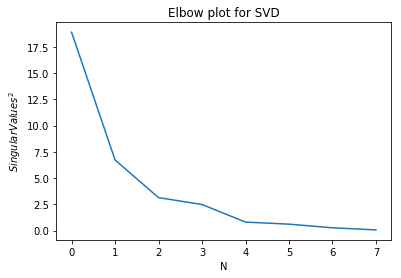

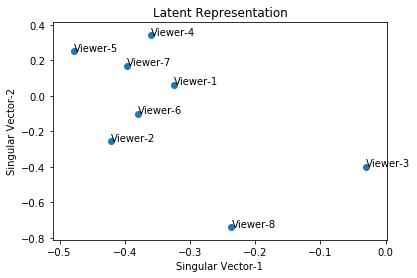

X=
.[[0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 1]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1]]
U=
.[[-0.3  0.1  0.2 -0.5  0.3 -0.1  0.6  0.3]]
V=
.[[-0.4]
 [ 0.2]
 [-0.2]
 [ 0.5]
 [-0.2]
 [-0.1]
 [ 0.1]
 [-0.4]
 [ 0.5]
 [ 0.1]]
Score=
.[[ 0.04617607  0.13424659  0.90155657  0.80904016  1.08909287 -0.10131373
   0.00178218 -0.01146103  0.33989904 -0.01146103]
 [ 0.85755057  0.24667006  0.833104    1.18902275 -0.02676863  0.91670222
  -0.25609555  0.04972616  0.98032617  0.04972616]
 [-0.07490512  0.18119043 -0.163318    0.04154119  0.10063693  0.06511688
   0.73284046  1.05405289 -0.02507818  1.05405289]
 [ 0.92169354  0.97179058  0.97125888  0.45296099  0.74685223 -0.20282477
   0.11635324 -0.0363745  -0.23253264 -0.0363745 ]
 [ 0.98194855  0.93417357  1.22986704  0.83167816  0.91856706 -0.01869716
   0.07269657  0.00622443  0.07478216  0.00622443]
 [-0.01053514 -0.07415909  0.97446354  1.1163

In [4]:
#SVD Calculatiom
U, s, Vh = svd(X)
print(np.shape(U))
print(np.shape(Vh))
print(np.shape(s))
#Elbow PLot: To decide significant singular values
plt.plot(s**2)
plt.xlabel('N')
plt.ylabel('$Singular Values^2$')
plt.title('Elbow plot for SVD')
plt.show()
plt.scatter(U[:,0],U[:,1])
for i,name in enumerate(['Viewer-1','Viewer-2','Viewer-3','Viewer-4','Viewer-5','Viewer-6','Viewer-7','Viewer-8']):
    plt.annotate(name,(U[i,0],U[i,1]))
plt.xlabel('Singular Vector-1')
plt.ylabel('Singular Vector-2')
plt.title('Latent Representation')
plt.show()
#truncate to only first few singular values
s[4:]=0
#calculate estimate using truncated S
out_score = np.dot(np.dot(U,diagsvd(s,8,10)),Vh)
#show results
print("X=\n.{}".format(X))
print("U=\n.{}".format((U[:1,:].round(1))))
print("V=\n.{}".format(Vh[:,:1].round(1)))
print("Score=\n.{}".format(out_score))
print("Reconstructed-X=\n.{}".format(np.round(out_score)))

## Exercise-4.1-b
In previous part we used binary matrix for modeling viewer-movie recoomendation. Now suppose we are given a new data where each entry is a rating on a scale 1 to 10. Use SVD to learn latent representation and recommend 3 movies for viewer 8.

A sample data.

$$
Data = \left( \begin{array}{ccccccccccc}
                       & Movie-1 & Movie-2 & Movie-3 & Movie-4 & Movie-5 & Movie-6 & Movie-7 & Movie-8 & Movie-9 & Movie-10  \\ 
                Viewer-1 & \_  & \_ & 5 & 4 & 6 & \_ & \_ & \_ & \_ & \_\\
                Viewer-2 & 8  & \_ &  2 & 3 & \_ & 6 & \_ & \_ & 7 & \_\\  
                Viewer-3 & \_ &  \_ &  \_ & \_ & \_ & \_ & 4 & 8  & \_ & 1\\ 
                Viewer-4 & 2  & 5 & 9 & \_ & 9 & \_ & \_ & \_ & \_ & \_\\
                Viewer-5 & 3  & 3 & 3 & 7 & 8 & \_ & \_ & \_ & \_  & \_\\                
                Viewer-6 & \_ & \_ & 4 & 3 & 8 & \_ & \_ & \_ & 6 & \_ \\
                Viewer-7 & 2  & 5  & 7 & 6 & \_ & \_ & \_ & \_ & \_ & \_ \\
                Viewer-8 & \_  & \_ & \_ & 5 & \_ & 1 & \_ & 8 & 3 & 7\\  
                \end{array} 
\right)
$$


In [5]:
########################################
####### Your Code Here  ################
########################################



## Exercise-4.2 
# Introduction To Tensor
This part is an introduction to tensor. We will do the following task:

(a) Storing tensor using numpy array.

(b) Slicing operations on tensors.

(c) Folding and Unfolding tensors.



In [5]:
data = np.arange(36).reshape((3,4,3))
print('Data= \n{}'.format(data))
tensor = np.array([data.T[i].T for i in range(len(data))])
print('Tensor= \n{}'.format(tensor))

Data= 
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]
Tensor= 
[[[ 0  3  6  9]
  [12 15 18 21]
  [24 27 30 33]]

 [[ 1  4  7 10]
  [13 16 19 22]
  [25 28 31 34]]

 [[ 2  5  8 11]
  [14 17 20 23]
  [26 29 32 35]]]


In [7]:
# To view frontal slide-1
print(data[:,:,0])

[[ 0  3  6  9]
 [12 15 18 21]
 [24 27 30 33]]


In [8]:
# To view frontal slide-2
print(data[:,:,1])

[[ 1  4  7 10]
 [13 16 19 22]
 [25 28 31 34]]


In [9]:
# To view frontal slide-3
print(data[:,:,2])

[[ 2  5  8 11]
 [14 17 20 23]
 [26 29 32 35]]


## Unfolding and folding Tensors

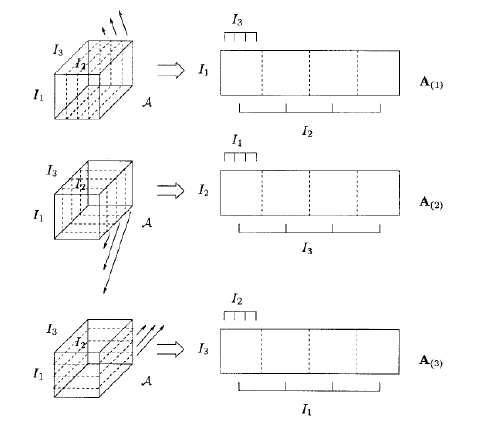

In [11]:
from IPython.display import Image
Image(filename='Unfolding-of-third-order-of-a-tensor.png')

In [18]:
def unfold(X, mode):
    return np.reshape(np.moveaxis(X, mode-1,0),(X.shape[mode-1],-1))

def fold(X, mode, shape):
    new_shape = list(shape)
    mode_dim = new_shape.pop(mode-1)
    new_shape.insert(0, mode_dim)
    return np.moveaxis(np.reshape(X, new_shape), 0, mode-1)

In [19]:
unfold(data,mode=1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [20]:
unfold(data,mode=2)

array([[ 0,  1,  2, 12, 13, 14, 24, 25, 26],
       [ 3,  4,  5, 15, 16, 17, 27, 28, 29],
       [ 6,  7,  8, 18, 19, 20, 30, 31, 32],
       [ 9, 10, 11, 21, 22, 23, 33, 34, 35]])

In [21]:
unfold(data,mode=3)

array([[ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33],
       [ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34],
       [ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35]])

In [22]:
unfold_tensor = unfold(data,mode=0)
fold(unfold_tensor, mode=0, shape=data.shape)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

## Tensor Decomposition
Now we will extend idea of matrix factorization to tensors. In following part we will learn two methods for tensor factorization: CP decomposition and RESCAL. Further we will see how to use them with RDF dataset for link prediction.
For purpose of experiments we will use kinship(alyawarra) dataset.

The alyawarra dataset used in this exercise has 26 relations (brother, sister, father,...} between 104 people. Using tensor factorization we will predict missing relations and evaluate the performance using area-under-curve.

## Exercise-4.3
$\textbf{CP Decomposition}$ is a generalization of the matrix SVD to tensors.
The CP Decomposition factorizes a tensor into a sum of outer products of vectors. For a 3-way tensor CP decomposition is written as:

$ \mathbf{T = \sum_r^R \lambda_r {a_r}^1 \odot {a_r}^2 \odot {a_r}^3} + \epsilon$

where $\odot$ denotes outer product for tensors, Y_f is the approximated tensor and \epsilon is an error.

To approximate above factorization we will define a loss minimizing Frobenius Norm:

$L = argmin_{{a_r}^1,{a_r}^2,{a_r}^3} ||T-\sum_r^R \lambda_r {a_r}^1 \odot {a_r}^2 \odot {a_r}^3||^2 $

To solve the above function we will use alternating least square method similar to least square method used in last exercise.(Proof as an exercise!)



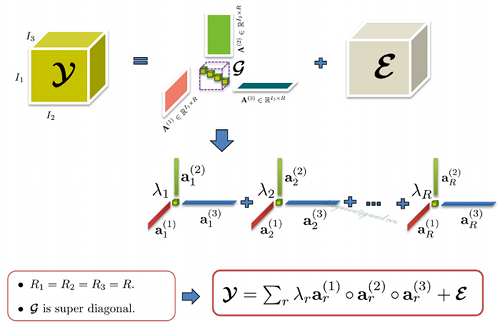

In [11]:
from IPython.display import Image
Image(filename='CP.png')

In [16]:
import pandas as pd
import pdb
from sktensor import dtensor, cp_als
from scipy.io.matlab import loadmat
import matplotlib.pyplot as plt
import itertools

mat = loadmat('alyawarradata.mat')
T = mat['Rs']
T = dtensor(T)
trainT = np.zeros_like(T)
p = 0.7
train_mask = np.random.binomial(1, p, T.shape)
trainT[train_mask==1] = T[train_mask==1]
test_mask = np.ones_like(T)
test_mask[train_mask==1] = 0
print('training size %d' % np.sum(trainT))
print('test size %d' % np.sum(T[test_mask==1]))

# Decompose tensor using CP-ALS
P, fit, itr, exectimes = cp_als(trainT, 3, init='random')
reconstructed_tensor = P.totensor()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(T[test_mask==1], reconstructed_tensor[test_mask==1]))

training size 7673
test size 3117
0.877585512411


## CP Entity Embedding Visualization

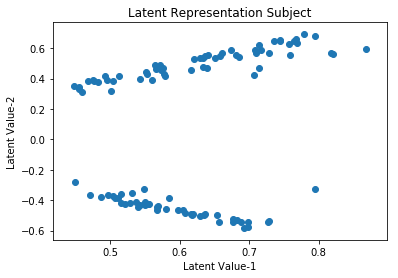

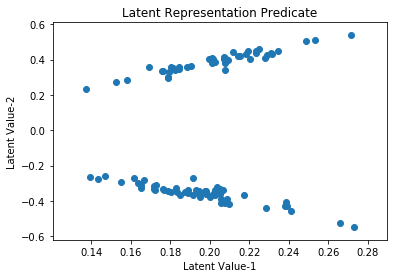

In [17]:
subject_emb = P.U[0]
plt.scatter(subject_emb[:,0],subject_emb[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation Subject')
plt.show()

object_emb = P.U[1]
plt.scatter(object_emb[:,0],object_emb[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation Predicate')
plt.show()

## Exercise-4.4
## Rescal Decomposition

RESCAL factorization corresponds to Tucker2 decomposition with the constraint that two factor matrices have to be identical

$ \mathbf{T = R \times_1 A \times_2 A} + \epsilon$

$ \mathbf{T_{:,:,k} = A R_{:,:,k} A^T} + \epsilon$

where $\textbf{A}\in \mathbb{R}^{|V|\times r} $ represents the entity-latent-component space. $\textbf{R}_{:,:,k}\in \mathbb{R}^{r\times r} $ is an asymmetric matrix that specifies the interaction of the latent components for the k-th relation. Y_f is the approximated tensor and \epsilon is a noise estimate.

To approximate above factorization we will define a loss minimizing Frobenius Norm:

$L = argmin_{A,R} \sum_k||T-A R_{:,:,k} A^T||^2 $

To solve the above loss function we will again use alternating least square method. (Proof as an exercise!)


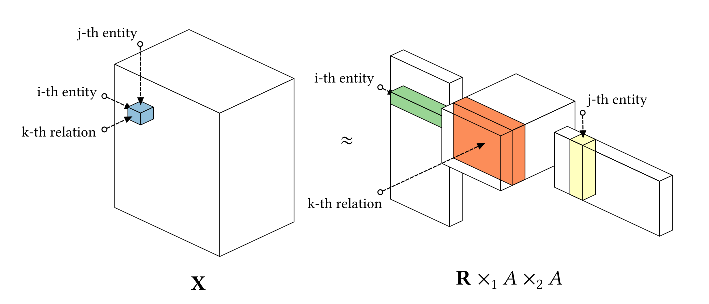

In [13]:
from IPython.display import Image
Image(filename='rescal.png')

In [16]:
from numpy.linalg import norm
from numpy.random import shuffle
from scipy.sparse import lil_matrix
from sklearn.metrics import precision_recall_curve, auc
from rescal import rescal_als

def normalize_predictions(P, nm_entities, nm_relations):
    for a in range(nm_entities):
        for b in range(nm_entities):
            nrm = norm(P[a, b, :nm_relations])
            if nrm != 0:
                # round values for faster computation of AUC-PR
                P[a, b, :nm_relations] = np.round_(P[a, b, :nm_relations] / nrm, decimals=3)
    return P

def rescal_fact(train_tensor, n_dim, nm_entities, nm_relations):

    entity_embedding, R, _, _, _ = rescal_als(train_tensor, n_dim, init='nvecs', conv=1e-3,lambda_A=10, lambda_R=10)
    n = entity_embedding.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(entity_embedding, np.dot(R[k], entity_embedding.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)

    return entity_embedding, reconstructed_tensor

def load_data(filename, train_fraction=0.7):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], np.float32)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # construct array for rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    idx_test = IDX[train:]

    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # set values to be predicted to zero
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, mask_idx, nm_entities, nm_relations

n_dim = 100
filename='alyawarradata.mat'
K, train_tensor, target_idx, nm_entities, nm_relations = load_data(filename, train_fraction=0.7)
# Train Rescal
entity_embedding, reconstructed_tensor = rescal_fact(train_tensor, n_dim, nm_entities, nm_relations)
#prec, recall, _ = precision_recall_curve(K[target_idx], reconstructed_tensor[target_idx])
#entities = mat['names']
print('AUC\n{}'.format(roc_auc_score(K[target_idx], reconstructed_tensor[target_idx])))

AUC
0.9855603205907866


## Rescal Entity Embedding Visualization

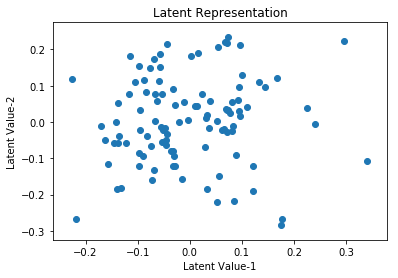

In [17]:
plt.scatter(entity_embedding[:,0],entity_embedding[:,1])
plt.xlabel('Latent Value-1')
plt.ylabel('Latent Value-2')
plt.title('Latent Representation')
plt.show()

## Exercise-4.5 
In last part we used RESCAL to find latent representation of entities in knowledge graph. For RESCAL we need to specify certain parameters. In this exercise we will tune these parameters for optimum performance. We will divide dataset in three parts: training, validation and test. First we find latent representation using training set then we use latent features to compute performance on validation set. Finally we select parameters with optimum performance on validation set and report performance on test set. 


In [18]:
def load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], np.float32)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # construct array for rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    val = int(val_fraction*len(IDX))
    idx_val = IDX[train:train+val]
    idx_test = IDX[train+val:]
    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test+idx_val, (nm_entities, nm_entities, nm_relations))
    val_idx = np.unravel_index(idx_val, (nm_entities, nm_entities, nm_relations))
    test_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # set values to be predicted to zero
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, val_idx, test_idx

n_dim = 10
filename='alyawarradata.mat'
# Mask Test and Validation Triples
K, train_tensor, val_idx, test_idx = load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2)
var_list = [0.001, 0.1, 1., 10., 100.]
best_roc = 0
# Train on training set and evaluate on validation set
for (var_x, var_e, var_r) in itertools.product(var_list, repeat=3):
    A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
    n = A.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
    score = roc_auc_score(K[val_idx], reconstructed_tensor[val_idx])

    print('var_x:{0:3.3f}, var_e:{1:3.3f}, var_r:{2:3.3f}, AUC-ROC:{3:.3f}'.format(var_x, var_e, var_r, score))
    if score > best_roc:
        best_vars = (var_x, var_e, var_r)
        best_roc = score
        
lambda_a, lambda_r, lambda_v = best_vars
print(best_vars, best_roc)
# Use optimum parameters on Validation Set and Test on Hold-Out Set
lambda_a, lambda_r, lambda_v = best_vars
A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
n = A.shape[0]
reconstructed_tensor = np.zeros((n, n, len(R)))
for k in range(len(R)):
    reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
score = roc_auc_score(K[test_idx], reconstructed_tensor[test_idx])
print('AUC On Test Set with Optimum Parameters\n{}'.format(score))

var_x:0.001, var_e:0.001, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:0.001, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:0.100, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:10.000, AUC-ROC:0.964
var_x:0.001, var_e:1.000, var_r:100.000, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:0.001, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:0.100, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:1.000, AUC-ROC:0.964
var_x:0.001, var_e:10.000, var_r:1

## References
1) https://github.com/mnick/scikit-tensor

2) https://github.com/mnick/rescal.py

3) http://www.bsp.brain.riken.jp/~zhougx/tensor.html

4) https://edoc.ub.uni-muenchen.de/16056/1/Nickel_Maximilian.pdf

5) http://epubs.siam.org/doi/abs/10.1137/S0895479896305696